In [1]:
import pandas as pd
import numpy as np
rundf = pd.read_csv('results/'+
    'SIsaR_0.9.4.2 experiments 2 seeds-table_1000_basic_control_schoolOnSeptNewControlOctFac.csv',
                    sep=',',skiprows=6)

In [2]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [3]:
rundf.columns

Index(['[run number]', '[step]', 'seed0', 'seed', 'cp1cRed', 'cp1cRedNH',
       'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed', 'cp2cRedNH',
       'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed', 'cp3cRedNH',
       'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed', 'cp4cRedNH',
       'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cumulativeRedCount',
       'cumulativeVioletCount', 'cumulativeDeadCount', 'ticks', 'TinfSch',
       'SinfSch', 'TinfNotSch', 'SinfNotSch', 'totalInfected',
       'totalInfected&Deceased'],
      dtype='object')

In [4]:
rundf.replace(-1, np.nan, inplace=True)

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1000 runs with containment measures, school open in Sep, new controls in the second wave + (counterfactual) closing factories

In [6]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,949.00,1000.00,1000.00,1000.00
mean,3.95,146.93,388.93,190.73
std,7.09,167.50,446.95,121.66
min,0.00,0.00,2.00,14.00
25%,0.00,9.00,18.75,88.00
50%,0.00,72.50,193.00,150.50
75%,5.00,255.25,692.50,298.00
max,50.00,769.00,1967.00,732.00


In [7]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [8]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     949.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       3.95 &              146.93 &                  388.93 &  190.73 \\
std   &       7.09 &              167.50 &                  446.95 &  121.66 \\
min   &       0.00 &                0.00 &                    2.00 &   14.00 \\
25\%   &       0.00 &                9.00 &                   18.75 &   88.00 \\
50\%   &       0.00 &               72.50 &                  193.00 &  150.50 \\
75\%   &       5.00 &              255.25 &                  692.50 &  298.00 \\
max   &      50.00 &              769.00 &                 1967.00 &  732.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<AxesSubplot:title={'center':'ticks'}>]], dtype=object)

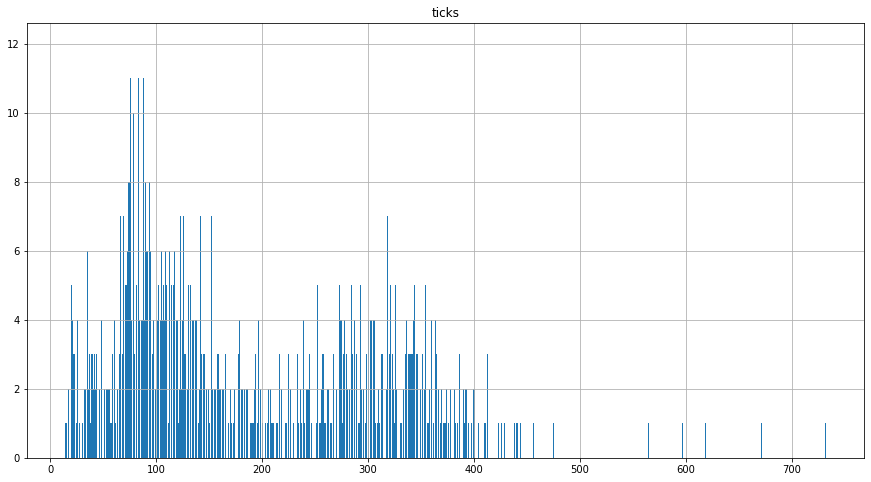

In [9]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'cumulativeRedCount'}>]],
      dtype=object)

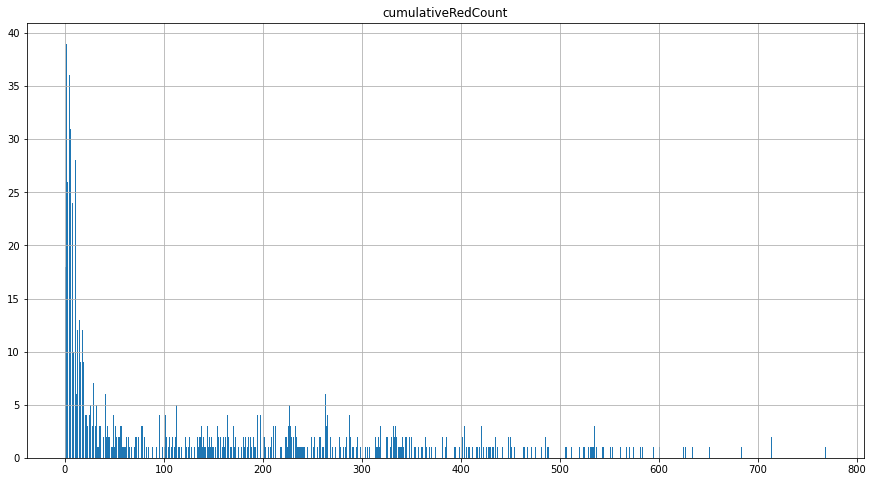

In [10]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

<AxesSubplot:title={'center':'symptomatic agent cumulative count vs. time'}, xlabel='ticks', ylabel='cumulativeRedCount'>

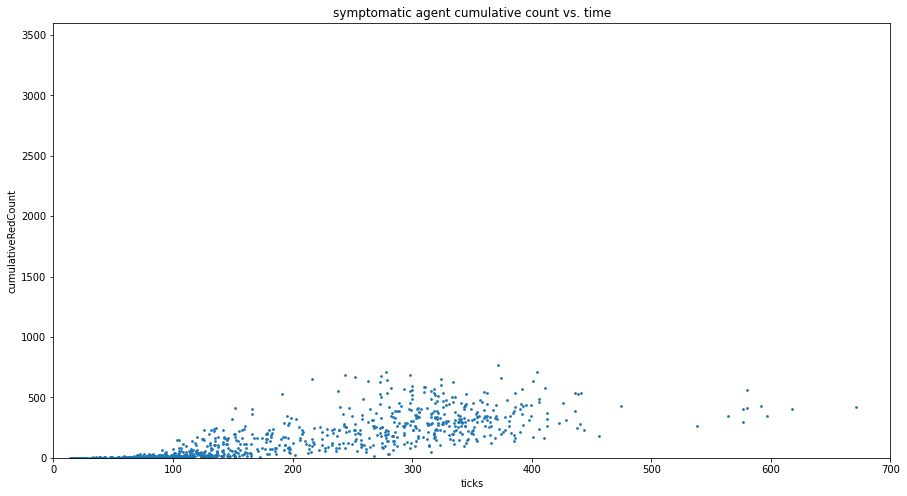

In [11]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected'}>]], dtype=object)

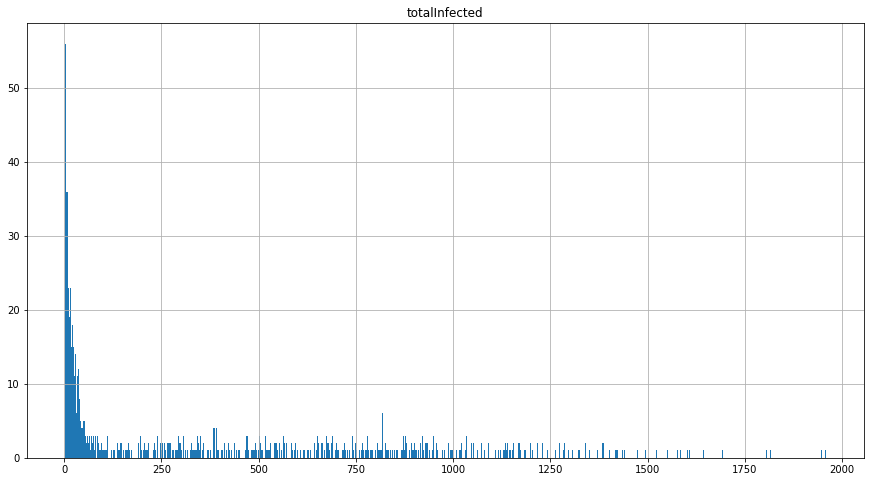

In [12]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<AxesSubplot:title={'center':'cumulativeDeadCount'}>]],
      dtype=object)

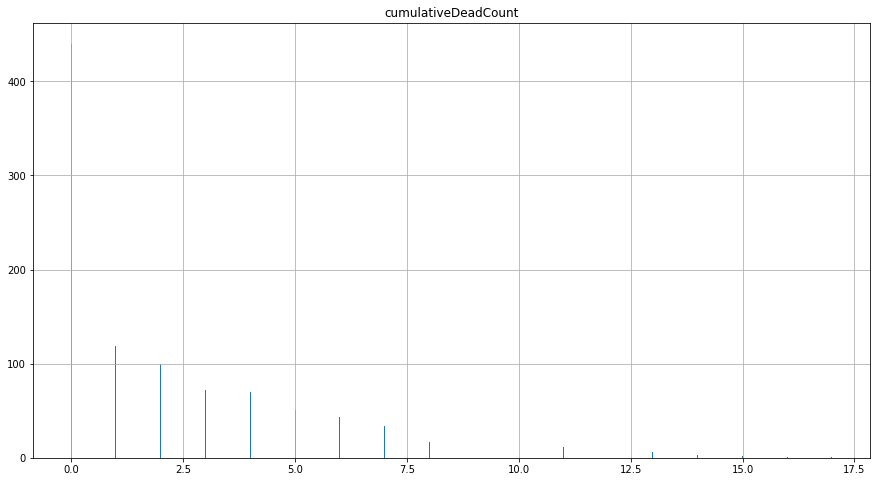

In [13]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected&Deceased'}>]],
      dtype=object)

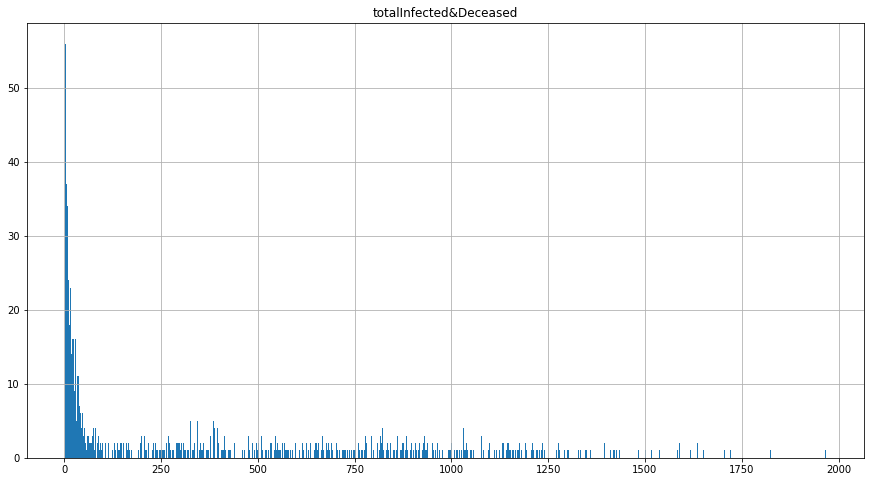

In [14]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

<AxesSubplot:title={'center':'simptomatic+asymptomatic+deceased vs. time'}, xlabel='ticks', ylabel='totalInfected&Deceased'>

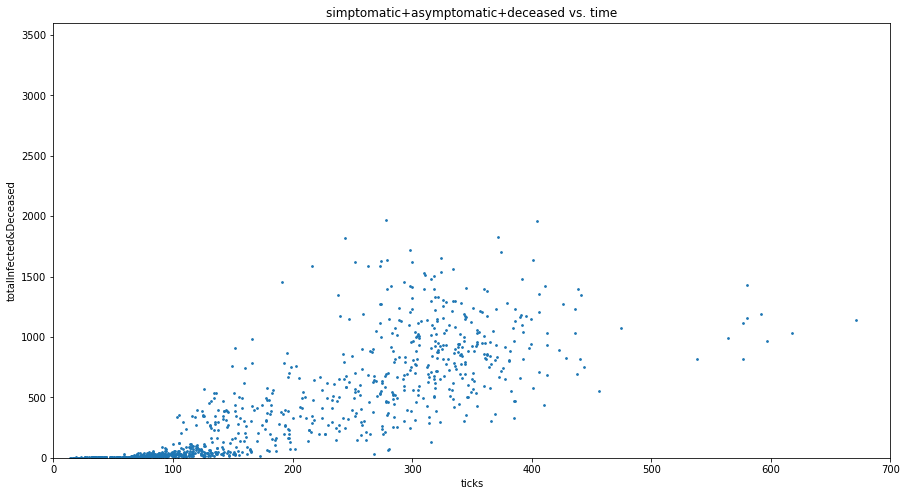

In [15]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

# Heatmaps

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

#import numpy as np
import seaborn as sns; sns.set()

### bins = 10

### symptomatic + asymptomatic + deceases

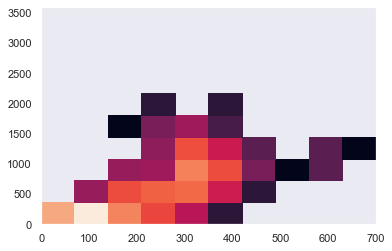

In [17]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [18]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]])

In [19]:
z10=np.amax(hist[0]) # max level z axis
z10

337.0

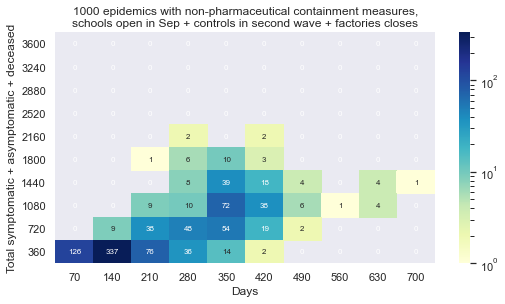

In [20]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()

### bins = 20

### symptomatic + asymptomatic + deceases

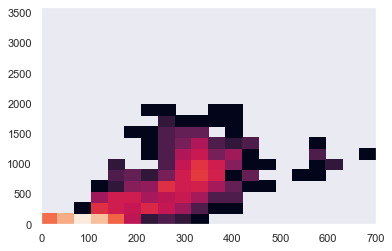

In [21]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [22]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]])

In [23]:
z20=np.amax(hist[0]) # max level z axis
z20

205.0

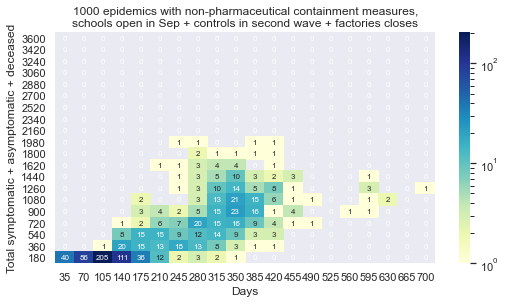

In [24]:
lognorm = LogNorm(vmin=1.0, vmax=z20)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()

### bins = 30

### symptomatic + asymptomatic + deceases

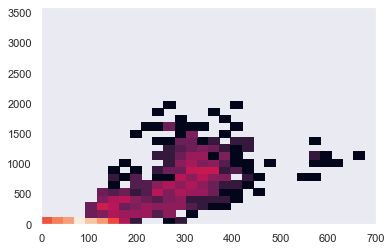

In [25]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [26]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

In [27]:
z30=np.amax(hist[0]) # max level z axis
z30

159.0

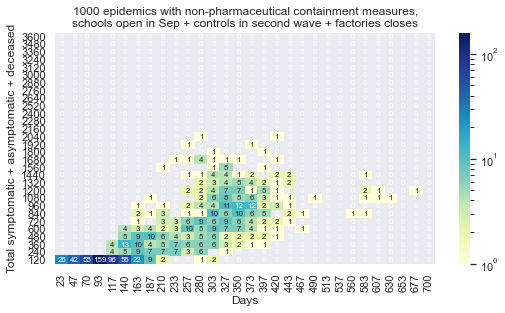

In [28]:
lognorm = LogNorm(vmin=1.0, vmax=z30)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()

### bins = 60

### symptomatic + asymptomatic + deceases

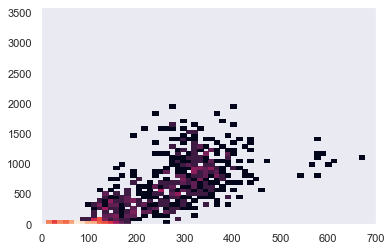

In [29]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [30]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]])

In [31]:
z60=np.amax(hist[0]) # max level z axis
z60

84.0

In [32]:
#firstRow
np.transpose(hist[0])[0]

array([ 0., 26., 14., 28., 21., 37., 84., 73., 44., 40., 19., 16., 12.,
        6.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

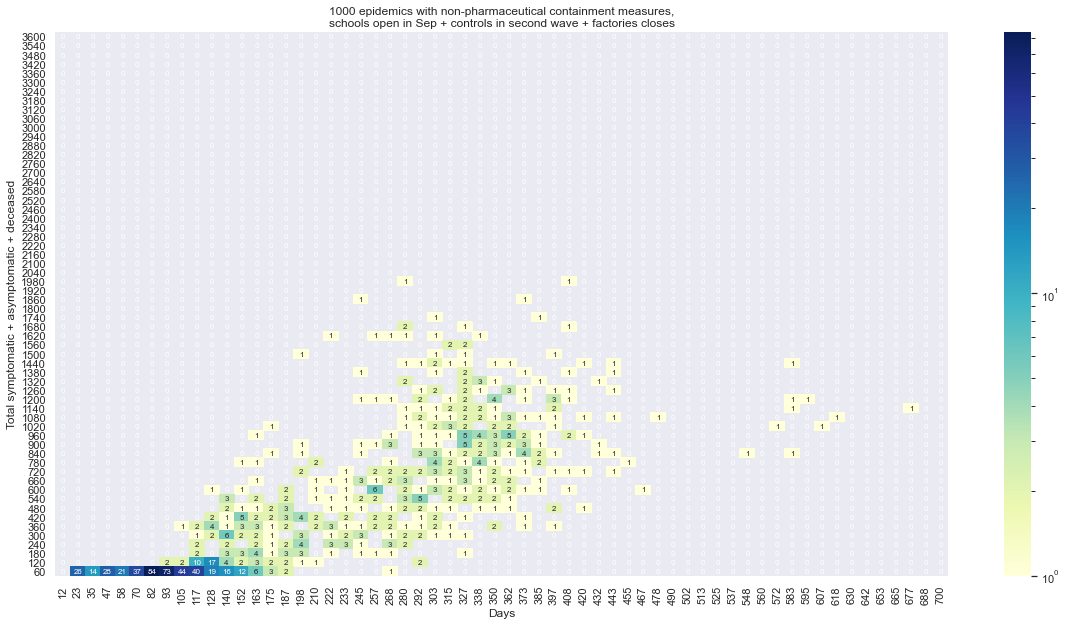

In [33]:
lognorm = LogNorm(vmin=1.0, vmax=z60)
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()

# Epidemics concluded before Sep 14

In [34]:
rundfBefore=rundf[rundf.ticks<=225]
rundfBefore.shape[0] # rows

613

In [35]:
rundfBefore[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,562.00,613.00,613.00,613.00
mean,3.06,46.14,108.40,105.43
std,6.32,75.96,187.49,48.49
min,0.00,0.00,2.00,14.00
25%,0.00,5.00,10.00,74.00
50%,0.00,13.00,25.00,98.00
75%,2.00,51.00,93.00,135.00
max,50.00,652.00,1588.00,225.00


In [36]:
tmp=rundfBefore[['cumulativeRedCount','totalInfected&Deceased','ticks']].describe();

In [37]:
print (tmp.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &              613.00 &                  613.00 & 613.00 \\
mean  &               46.14 &                  108.40 & 105.43 \\
std   &               75.96 &                  187.49 &  48.49 \\
min   &                0.00 &                    2.00 &  14.00 \\
25\%   &                5.00 &                   10.00 &  74.00 \\
50\%   &               13.00 &                   25.00 &  98.00 \\
75\%   &               51.00 &                   93.00 & 135.00 \\
max   &              652.00 &                 1588.00 & 225.00 \\
\bottomrule
\end{tabular}



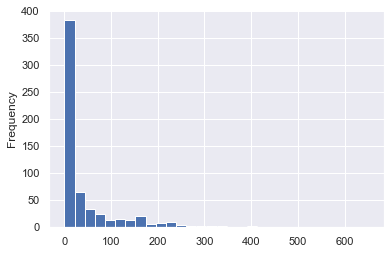

In [38]:
rundfBefore['cumulativeRedCount'].plot.hist(bins=30);

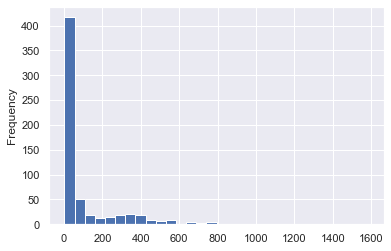

In [39]:
rundfBefore['totalInfected&Deceased'].plot.hist(bins=30);

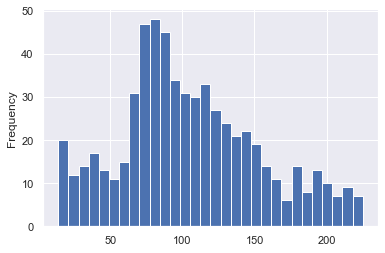

In [40]:
rundfBefore['ticks'].plot.hist(bins=30);

# Epidemics still active after Sep 14

In [41]:
rundf.shape[0] # rows

1000

In [42]:
rundf.ticks.describe() # ticks measures 

count   1000.00
mean     190.73
std      121.66
min       14.00
25%       88.00
50%      150.50
75%      298.00
max      732.00
Name: ticks, dtype: float64

In [43]:
# at 225 we are at Sep 14, opening day of schools
rundf=rundf[rundf.ticks>225]

In [44]:
rundf.shape[0] # rows

387

In [45]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,387.00,387.00,387.00,387.00
mean,5.24,306.58,833.29,325.84
std,7.92,147.57,371.93,68.72
min,0.00,15.00,34.00,227.00
25%,0.00,197.00,560.50,280.50
50%,1.00,291.00,822.00,318.00
75%,8.00,402.00,1077.00,353.00
max,40.00,769.00,1967.00,732.00


In [46]:
tmp=rundf[['cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [47]:
print (tmp.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &              387.00 &                  387.00 & 387.00 \\
mean  &              306.58 &                  833.29 & 325.84 \\
std   &              147.57 &                  371.93 &  68.72 \\
min   &               15.00 &                   34.00 & 227.00 \\
25\%   &              197.00 &                  560.50 & 280.50 \\
50\%   &              291.00 &                  822.00 & 318.00 \\
75\%   &              402.00 &                 1077.00 & 353.00 \\
max   &              769.00 &                 1967.00 & 732.00 \\
\bottomrule
\end{tabular}



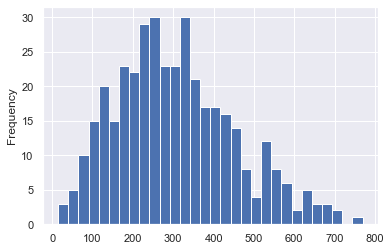

In [48]:
rundf['cumulativeRedCount'].plot.hist(bins=30);

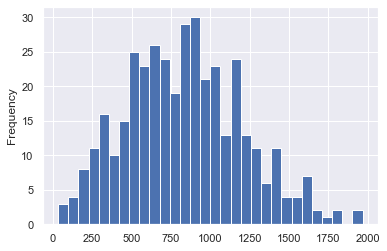

In [49]:
rundf['totalInfected&Deceased'].plot.hist(bins=30);

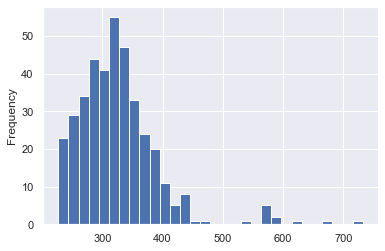

In [50]:
rundf['ticks'].plot.hist(bins=30);

### bins = 10

### symptomatic + asymptomatic + deceases

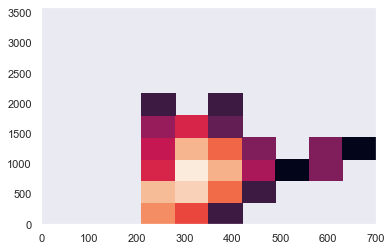

In [51]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [52]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]])

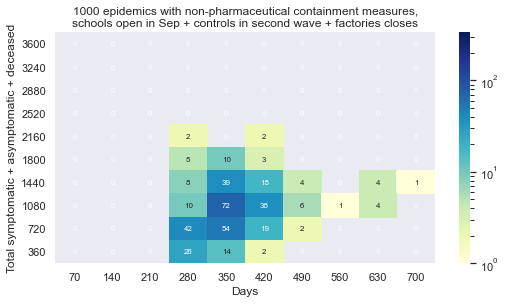

In [53]:
lognorm = LogNorm(vmin=1.0, vmax=z10)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()

### bins = 20

### symptomatic + asymptomatic + deceases

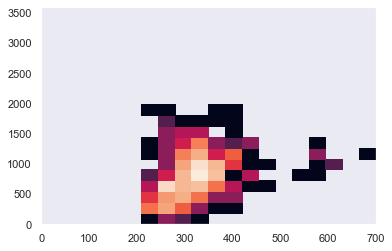

In [54]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [55]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]])

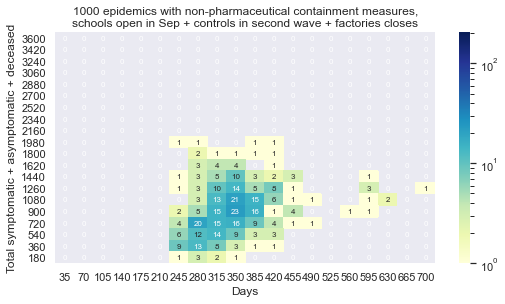

In [56]:
lognorm = LogNorm(vmin=1.0, vmax=z20)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()

### bins = 30

### symptomatic + asymptomatic + deceases

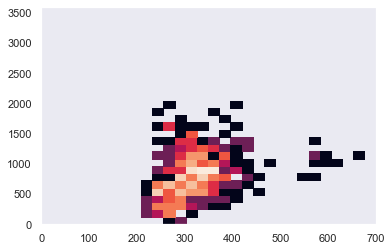

In [57]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [58]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

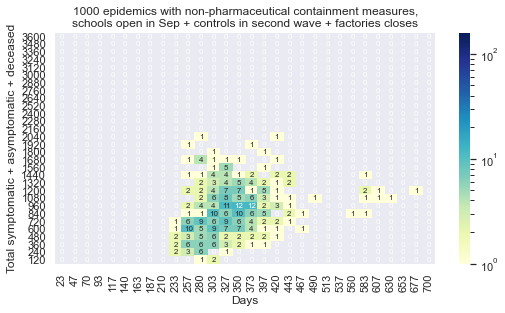

In [59]:
lognorm = LogNorm(vmin=1.0, vmax=z30)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()

### bins = 60

### symptomatic + asymptomatic + deceases

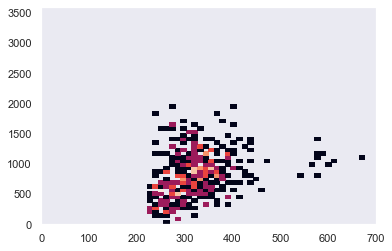

In [60]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [61]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]])

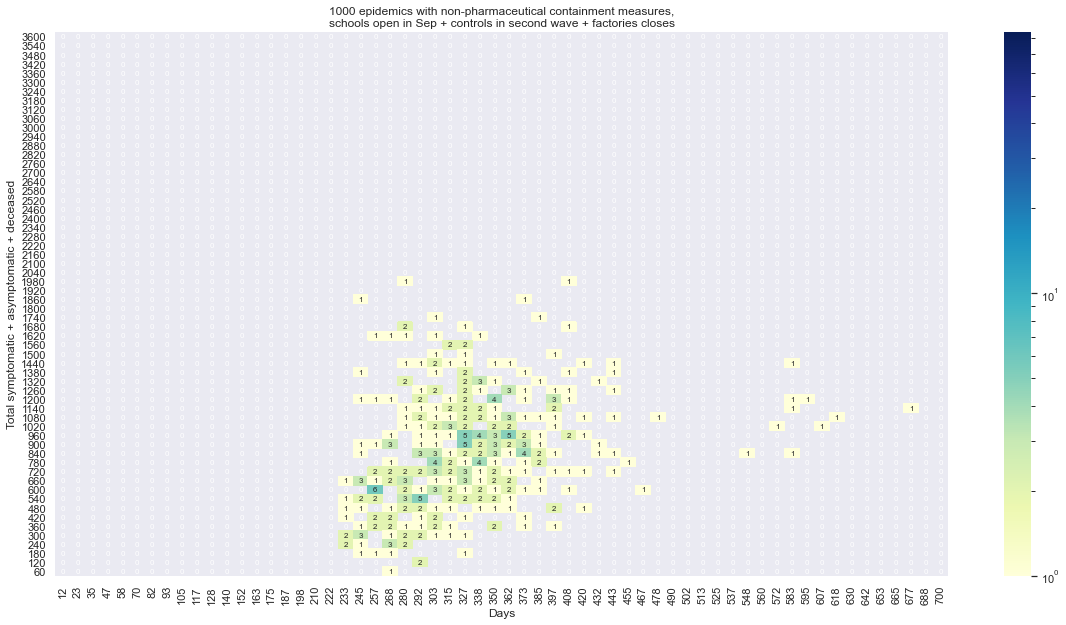

In [62]:
lognorm = LogNorm(vmin=1.0, vmax=z60)
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave + factories closes')

plt.show()